In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"c:\DATA SCIENCE\Machine_Learning\User_Data.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.shape

(400, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.duplicated().sum(
)

np.int64(0)

In [7]:
df.columns=df.columns.str.strip()

In [8]:
df.drop("User ID",axis=1,inplace=True)

In [9]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["Gender"]=encoder.fit_transform(df[["Gender"]])

c:\Users\prasa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


<Axes: >

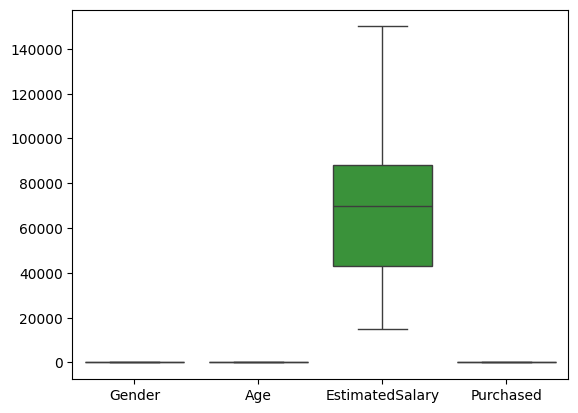

In [12]:
sns.boxplot(data=df)

In [13]:
x=df.drop("Purchased",axis=1)
y=df["Purchased"]
x

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=20,train_size=0.86)
x_train.shape,x_test.shape

((344, 3), (56, 3))

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

<Axes: >

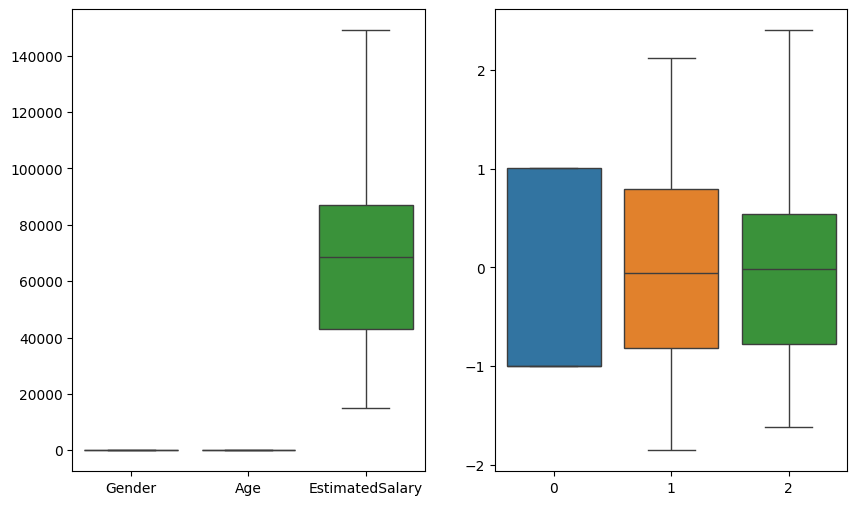

In [16]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(x_train)
plt.subplot(1,2,2)
sns.boxplot(x_train_scaled)
#difference between before and after scaling

In [17]:
from sklearn.svm import SVC
#normal data
model=SVC()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_predict))
print(classification_report(y_test,y_predict))

0.8392857142857143
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        33
           1       1.00      0.61      0.76        23

    accuracy                           0.84        56
   macro avg       0.89      0.80      0.82        56
weighted avg       0.87      0.84      0.83        56



In [18]:
#scaling data
model1=SVC()
model1.fit(x_train_scaled,y_train)
y_predict1=model1.predict(x_test_scaled)
print(accuracy_score(y_test,y_predict1))
print(classification_report(y_test,y_predict1))

0.9642857142857143
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       0.96      0.96      0.96        23

    accuracy                           0.96        56
   macro avg       0.96      0.96      0.96        56
weighted avg       0.96      0.96      0.96        56



In [19]:
from sklearn.linear_model import LogisticRegression
model_log=LogisticRegression()
model_log.fit(x_train,y_train)
y_predict_log=model_log.predict(x_test)
print(accuracy_score(y_test,y_predict_log))
print(classification_report(y_test,y_predict_log))

0.8928571428571429
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        33
           1       0.90      0.83      0.86        23

    accuracy                           0.89        56
   macro avg       0.90      0.88      0.89        56
weighted avg       0.89      0.89      0.89        56



c:\Users\prasa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
from sklearn.linear_model import LogisticRegressionCV
model_logcv=LogisticRegressionCV()
model_logcv.fit(x_train,y_train)
y_predict_logcv=model_logcv.predict(x_test)
print(accuracy_score(y_test,y_predict_logcv))
print(classification_report(y_test,y_predict_logcv))

c:\Users\prasa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\prasa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://sciki

0.8928571428571429
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        33
           1       0.90      0.83      0.86        23

    accuracy                           0.89        56
   macro avg       0.90      0.88      0.89        56
weighted avg       0.89      0.89      0.89        56



In [21]:
model_logcv.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [ ]:
from sklearn